### Dear Nick,
#### Drill is located at bottom of notebook.
#### Sincerely,
#### Paul

In [86]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from scipy import stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [87]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


## Assumptions of Multivariable Linear Regression

For regression to work its magic, inputs to the model need to be consistent with four assumptions:


### Assumption one: linear relationship

As mentioned earlier, features in a regression need to have a linear relationship with the outcome.  If the relationship is non-linear, the regression model will try to find any hint of a linear relationship, and only explain that – with predictable consequences for the validity of the model.

Sometimes this can be fixed by applying a non-linear transformation function to a feature.  For example, if the relationship between feature and outcome is quadratic and all feature scores are > 0, we can take the square root of the features, resulting in a linear relationship between the outcome and sqrt(feature).  


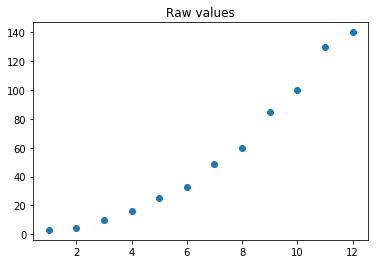

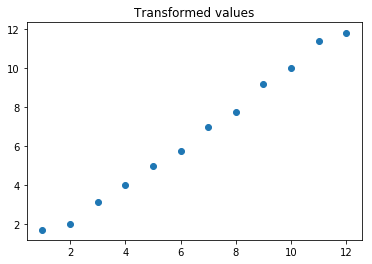

In [88]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

When interpreting features with non-linear transformations, it is important to keep the transformation in mind.  For example, in the equation $y = 2log({x})$, y increases by one unit for every two-unit increase in $log({x})$.  The relationship between y and x, however, is non-linear, and the amount of change in y varies based on the absolute value of x:

|x	|log(x)|	y|
|--|--|--|
|1	|0	|0|
|10	|1	|2|
|100	|2	|4|	
|1000|	3	|6|

So a one-unit change in x from 1 to 2 will result in a much greater change in y than a one-unit change in x from 100 to 101.

There are many variable transformations.  For a deep dive, check out the Variable Linearization section of [Fifty Ways to Fix Your Data](https://statswithcats.wordpress.com/2010/11/21/fifty-ways-to-fix-your-data/).

### Assumption two: multivariate normality

The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed.  Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in data.  

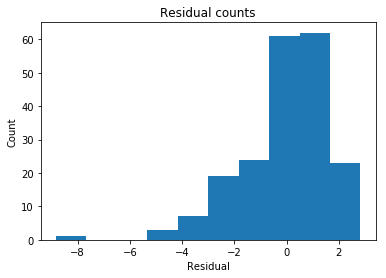

In [89]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


### Assumption three: homoscedasticity

The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or **homoscedastic**.

For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance.  This leads to overconfidence in the accuracy of your model's predictions.

Some fixes to heteroscedasticity include transforming the dependent variable and adding features that target the poorly-estimated areas. For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.

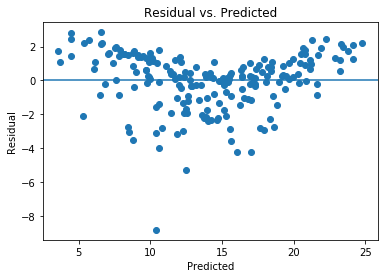

In [90]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption four: low multicollinearity

Correlations among features should be low or nonexistent.  When features are correlated, they may both explain the same pattern of variance in the outcome.  The model will attempt to find a solution, potentially by attributing half the explanatory power to one feature and half to the other.  This isn’t a problem if our only goal is prediction, because then all that matters is that the variance gets explained.  However, if we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.

Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

In [91]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


# Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

In [92]:
df = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


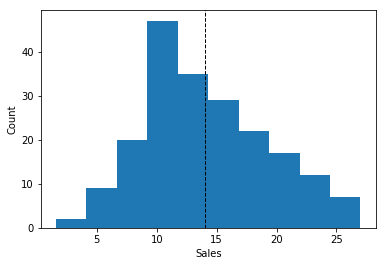

In [93]:
# Visualizing Sales Distribution
plt.hist(df.Sales)
plt.axvline(df.Sales.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

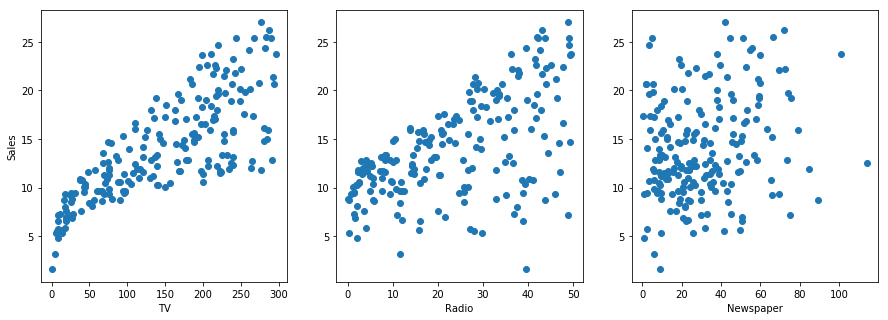

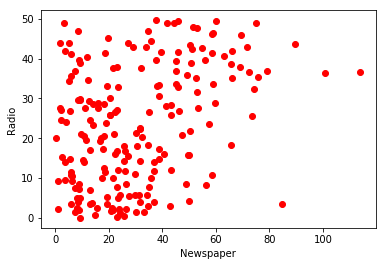

In [94]:
# Observing correlations between independent variables

plt.subplots(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.scatter(x=data.TV, y=data.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(x=data.Radio, y=data.Sales)
plt.xlabel('Radio')

plt.subplot(1, 3, 3)
plt.scatter(x=data.Newspaper, y=data.Sales)
plt.xlabel('Newspaper')

plt.show()

plt.scatter(x=data.Newspaper, y=data.Radio, color='r')
plt.xlabel('Newspaper')
plt.ylabel('Radio')
plt.show()

In [95]:
df['TV_log'] = np.log(df.TV)
df['Sales_log'] = np.log(df.Sales)
df['news_used'] = np.where(df.Newspaper>0,1,0)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,TV_log,Sales_log,news_used
0,1,230.100,37.800,69.200,22.100,5.439,3.096,1
1,2,44.500,39.300,45.100,10.400,3.795,2.342,1
2,3,17.200,45.900,69.300,9.300,2.845,2.230,1
3,4,151.500,41.300,58.500,18.500,5.021,2.918,1
4,5,180.800,10.800,58.400,12.900,5.197,2.557,1


#### Model 1

In [96]:
# Instantiate and fitting our first model.
regr = linear_model.LinearRegression()
Y = df['Sales'].values.reshape(-1, 1)
X = df[['TV_log','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.93617857e+00  2.06700329e-01 -2.53093402e-03]]

Intercept: 
 [-9.09887557]

R-squared:
0.9066722324831502


In [111]:
#Observing adjusted R-squared value against normal R-squared
model = smf.ols(formula='Sales ~ TV_log+Radio+Newspaper', data=df)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     634.7
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          1.23e-100
Time:                        11:07:44   Log-Likelihood:                -376.52
No. Observations:                 200   AIC:                             761.0
Df Residuals:                     196   BIC:                             774.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0989      0.577    -15.771      0.000     -10.237      -7.961
TV_log         3.9362      0.113     34.719      0.000       3.713       4.160
Radio          0.2067      0.008     25.199      0.000       0.191       0.223
Newspaper     -0.0025      0.006     -0.452      0.652      -0.014       0.009
==============================================================================
Omnibus:                       15.599   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.478
Skew:                           0.616   Prob(JB):                     0.000160
Kurtosis:                       3.761   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
df['predicted'] = regr.predict(X).ravel()
actual = df['Sales']
df['residual'] = actual - df.predicted
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,TV_log,Sales_log,news_used,predicted,residual
0,1,230.100,37.800,69.200,22.100,5.439,3.096,1,19.946,2.154
1,2,44.500,39.300,45.100,10.400,3.795,2.342,1,13.850,-3.450
2,3,17.200,45.900,69.300,9.300,2.845,2.230,1,11.411,-2.111
3,4,151.500,41.300,58.500,18.500,5.021,2.918,1,19.052,-0.552
4,5,180.800,10.800,58.400,12.900,5.197,2.557,1,13.444,-0.544


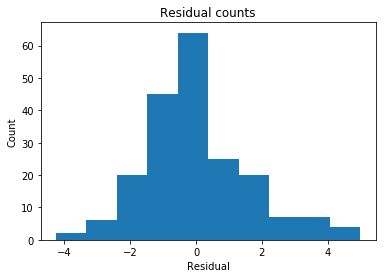

In [99]:
plt.hist(df.residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

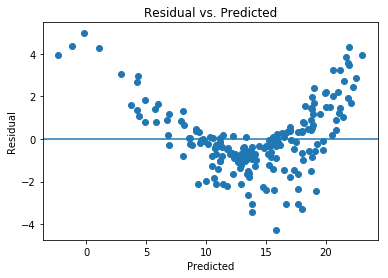

In [100]:
plt.scatter(df.predicted, df.residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#### Model 2

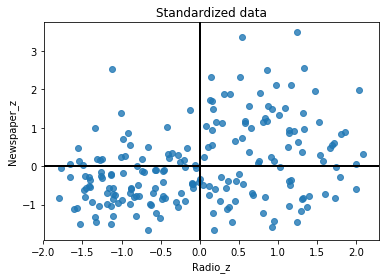

In [101]:
df_pca = df.loc[:, ['Radio', 'Newspaper']]

df_pca['Radio_z'] = (df_pca['Radio'] - df_pca['Radio'].mean()) / df_pca['Radio'].std()
df_pca['Newspaper_z'] = (df_pca['Newspaper'] - df_pca['Newspaper'].mean()) / df_pca['Newspaper'].std()

t = sns.regplot(
    'Radio_z',
    'Newspaper_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

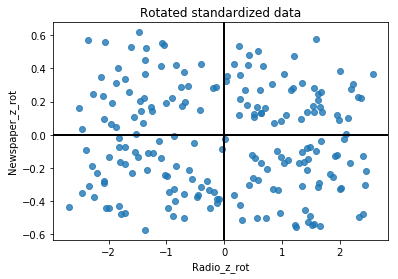

In [102]:
# Rotating the data so that the axes roughly match to vector above.
df_pca['Radio_z_rot'] = math.cos(40) * df_pca['Radio_z'] - math.sin(40) * df_pca['Radio_z']
df_pca['Newspaper_z_rot'] = math.sin(40) * df_pca['Newspaper_z'] + math.cos(40) * df_pca['Newspaper_z']

t = sns.regplot(
    'Radio_z_rot',
    'Newspaper_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [103]:
X = StandardScaler().fit_transform(df_pca)

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00502513  0.35588317  1.00502513  0.35588317 -1.00502513  0.35588317]
 [ 0.35588317  1.00502513  0.35588317  1.00502513 -0.35588317  1.00502513]
 [ 1.00502513  0.35588317  1.00502513  0.35588317 -1.00502513  0.35588317]
 [ 0.35588317  1.00502513  0.35588317  1.00502513 -0.35588317  1.00502513]
 [-1.00502513 -0.35588317 -1.00502513 -0.35588317  1.00502513 -0.35588317]
 [ 0.35588317  1.00502513  0.35588317  1.00502513 -0.35588317  1.00502513]]


In [104]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 6).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov))

Eigenvector 1: 
[[-0.40824829+0.j]
 [-0.40824829+0.j]
 [-0.40824829+0.j]
 [-0.40824829+0.j]
 [ 0.40824829+0.j]
 [-0.40824829+0.j]]
Eigenvalue 1: (4.0827248766668625+0j)
----------------------------------------
Eigenvector 2: 
[[ 0.40824829+0.j]
 [-0.40824829+0.j]
 [ 0.40824829+0.j]
 [-0.40824829+0.j]
 [-0.40824829+0.j]
 [-0.40824829+0.j]]
Eigenvalue 2: (1.9474258771019841+0j)
----------------------------------------
Eigenvector 3: 
[[-0.14074986-0.27592991j]
 [ 0.63425819+0.j        ]
 [ 0.13065185-0.15744422j]
 [-0.1924388 -0.14099282j]
 [-0.01009802-0.43337413j]
 [-0.44181939+0.14099282j]]
Eigenvalue 3: (1.3334081138920463e-16+2.0788476539270378e-16j)
----------------------------------------
Eigenvector 4: 
[[-0.14074986+0.27592991j]
 [ 0.63425819-0.j        ]
 [ 0.13065185+0.15744422j]
 [-0.1924388 +0.14099282j]
 [-0.01009802+0.43337413j]
 [-0.44181939-0.14099282j]]
Eigenvalue 4: (1.3334081138920463e-16-2.0788476539270378e-16j)
----------------------------------------
Eigenvector 5:

c:\users\paulb\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


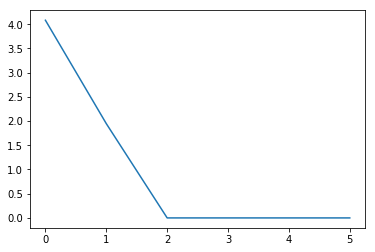

array([ 4.08272488e+00+0.00000000e+00j,  1.94742588e+00+0.00000000e+00j,
        1.33340811e-16+2.07884765e-16j,  1.33340811e-16-2.07884765e-16j,
       -1.32289136e-16+0.00000000e+00j, -3.78448380e-16+0.00000000e+00j])

In [105]:
plt.plot(eig_val_cov)
plt.show()
eig_val_cov

In [106]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Sales'].values.reshape(-1, 1)

#Adding column to DataFrame for later use in StatsModel
df['Radio_z_rot'] = df_pca['Radio_z_rot']
X = df[['TV_log','Radio_z_rot']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.93375716 -2.15947949]]

Intercept: 
 [-4.35621633]

R-squared:
0.9065748345339252


In [107]:
model = smf.ols(formula='Sales ~ TV_log+Radio_z_rot', data=df)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     955.8
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          3.90e-102
Time:                        11:07:12   Log-Likelihood:                -376.63
No. Observations:                 200   AIC:                             759.3
Df Residuals:                     197   BIC:                             769.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.3562      0.540     -8.066      0.000      -5.421      -3.291
TV_log          3.9338      0.113     34.807      0.000       3.711       4.157
Radio_z_rot    -2.1595      0.080    -26.836      0.000      -2.318      -2.001
==============================================================================
Omnibus:                       15.235   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.921
Skew:                           0.611   Prob(JB):                     0.000212
Kurtosis:                       3.734   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
df['predicted'] = regr.predict(X).ravel()
actual = df['Sales']
df['residual'] = actual - df.predicted
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,TV_log,Sales_log,news_used,predicted,residual,Radio_z_rot
0,1,230.100,37.800,69.200,22.100,5.439,3.096,1,20.023,2.077,-1.382
1,2,44.500,39.300,45.100,10.400,3.795,2.342,1,13.868,-3.468,-1.525
2,3,17.200,45.900,69.300,9.300,2.845,2.230,1,11.484,-2.184,-2.153
3,4,151.500,41.300,58.500,18.500,5.021,2.918,1,19.098,-0.598,-1.715
4,5,180.800,10.800,58.400,12.900,5.197,2.557,1,13.529,-0.629,1.185


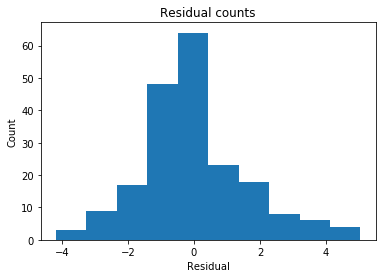

In [109]:
plt.hist(df.residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

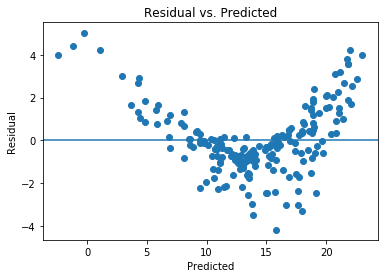

In [110]:
plt.scatter(df.predicted, df.residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In conclusion, by getting the logarithm of TV as well as well as conducting a principal component analysis on independent variables Radio and Newspaper (evenntually condensing them into a single variable), we were able to reduce the model from three inputs to two inputs without compromising on the variance explained. The two-input model increased the adjusted R-squared value by a whopping 0.001 (from 0.905 to 0.906) while maintaining the normal R-squared value at 0.907.